In [30]:
import tkinter as tk
from tkinter import *
from tkinter import filedialog
import numpy as np
import xlrd
import matplotlib.pyplot as plt
import copy
import math
import pandas as pd


root=tk.Tk()   
f=Frame(root)
#f.pack()

root.title('Petrophysical Evaluation')

ent1=tk.Entry(root)
ent1.grid(row=1,column=2)
e2 = tk.Entry(root)
e2.grid(row=2, column=2)
e3=tk.Entry(root)
e3.grid(row=3, column=2)
e4=tk.Entry(root)
e4.grid(row=4, column=2)

tk.Label(root, text="Number of useless HeaderLines").grid(row=2)
tk.Label(root, text="Start Depth").grid(row=3)
tk.Label(root, text="End Depth").grid(row=4)


exit_button = Button(root, text="Ok", command=root.destroy).grid(row=5,column=2)

def browsefunc():
    global filename
    filename = tk.filedialog.askopenfilename(filetypes=(("las files","*.las"),("All files","*.*")))
    ent1.insert(tk.END,filename) 
       
def myClick():
    global k 
    k=e2.get()

def Start_Depth():
    global start
    start=e3.get()
    return 
    
def End_Depth():
    global stop
    stop=e4.get()
    return 

b1=tk.Button(root,text="Browse",command=browsefunc)
b1.grid(row=1,column=3)
tk.Label(root, text="Choose the .las file").grid(row=1)    
   
b2=tk.Button(root, text="Enter", command=myClick)
b2.grid(row=2,column=3)

b3=tk.Button(root, text="Enter", command=Start_Depth)
b3.grid(row=3,column=3)

b4=tk.Button(root, text="Enter", command=End_Depth)
b4.grid(row=4,column=3)

start=Start_Depth()
root.mainloop()

#For inputs from entry to be int
if k is not None:
    k = int(k)    
if start is not None:
    start= float(start)    
if stop is not None:
    stop= float(stop) 

filename
start

In [31]:
import xlwt 
import os

def las_to_excel(well_name,line_number):
    file = open(well_name,'r')
    file = file.readlines()
    file = file[line_number:]
    file_data = []
    for i in range(len(file)):
        if i!= 1 | i!=0:
            file_data.append(file[i].split())
        if i==0:
            file_data[i].append(file[i].split(" ", 1)[1])
            
    workbook = xlwt.Workbook()
    
    sheet = workbook.add_sheet('Sheet 1')
    
    for i in range(len(file_data)):
        for j in range(len(file_data[i])):
            sheet.write(i,j,file_data[i][j])
            
    Folder=well_name.rsplit('/', 1)
    Folder_N=Folder[1].rsplit('.',1)
    #path1= os.path.normpath(os.path.join(Folder[0],Folder_N[0]))
    path1= os.path.join(Folder[0],Folder_N[0])
    
    if not os.path.exists(path1):
        os.makedirs(path1)
        
    file_location=path1+"/"+Folder_N[0]
    file_location=os.path.normpath(path1+"/"+Folder_N[0])
    file_Name=file_location + ".xls"
    workbook.save(file_Name)
    
    return file_location,file_Name


    
#Converting Las to Excel Files
location, Name=las_to_excel(filename, k)


In [32]:
#Cleaning the data and changing the excel into desired format
def Set_Column(file_Name):
    data = pd.read_excel(file_Name)
    index=len(data.columns)-2
    List=[]
    for i in range(len(data.columns)):
        List.append(0)
    
    for i in range(index):
        List[i]=data.columns.values[i+1]
    data.columns=List
    data.to_excel(file_Name+'x',  index=False)
    
    return data

In [33]:
def read_excel(address,sheet_number):

    loc = address

    wb = xlrd.open_workbook(loc)
    sheet = wb.sheet_by_index(sheet_number)

    r = sheet.nrows
    c = sheet.ncols

    data = np.zeros((r,c))

    for i in range(3,r):
        for j in range(c):
            data[i,j] = sheet.cell_value(i,j)
            
    return data

In [34]:
def plot_logs(k1):
    
    length=len(data.columns)
    length1=len(data)

    data1=pd.DataFrame(np.zeros((length1,4)))
    data1.iloc[:,0]=data.iloc[:,0]
    columns=['','','','']
    columns[0]=data.columns.values[0]
    m=1;
    for i in range(length-4):
        if k1[i]== 1:
            j=i+2
            data1.iloc[:,m]=data.iloc[:,j]
            columns[m]=data.columns.values[j]
            m=m+1
    data1.columns=columns  
    file_name=location+'1.xls'
    data1.to_excel(location+'1.xls')
    
    return 

In [35]:
well_name = location.rsplit('\\', 1)[1]
data=Set_Column(Name)
listbox=data.columns;

In [36]:
from tkinter import *
class Checkbar(Frame):
   def __init__(self, parent=None, picks=[], side=LEFT, anchor=W):
      Frame.__init__(self, parent)
      self.vars = []
      for pick in picks:
         var = IntVar()
         chk = Checkbutton(self, text=pick, variable=var)
         chk.pack(side=side, anchor=anchor, expand=YES)
         self.vars.append(var)
            
   def state(self):
    
    return map((lambda var: var.get()), self.vars)
    
if __name__ == '__main__':
   root1 = Tk()
   k=len(listbox)
   if k%2==1:
        k1=int((k+1)/2)
        k2=int(k-k1)
        listbox1=listbox[1:k1]
        listbox2=listbox[k1:k]
   else:
        k1=int(k/2)
        
        listbox1=listbox[1:k1]
        listbox2=listbox[k1:k]
        
   lng = Checkbar(root1, listbox1)
   tgl = Checkbar(root1,listbox2 )
   lng.pack(side=TOP,  fill=X)
   tgl.pack(side=LEFT)
   lng.config(relief=GROOVE, bd=2)
   
   def allstates(): 
        k1=list(lng.state());
        k2=list(tgl.state());
        k=k1+k2;
        lenght_list=len(k)
        #print(lenght_list);
        plot_logs(k)
   Button(root1, text='Quit', command=root.quit).pack(side=RIGHT)
   Button(root1, text='Peek', command=allstates).pack(side=RIGHT)

   root1.title('Choose any three plots for plot') 
   root1.mainloop()

28


['Unnamed: 0' 'MD' 'DT' 'DTL' 'SXO']


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\DELL\Anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-41-fe60c2cdc3cb>", line 88, in plot
    plot3.xlabel(label)
AttributeError: 'AxesSubplot' object has no attribute 'xlabel'


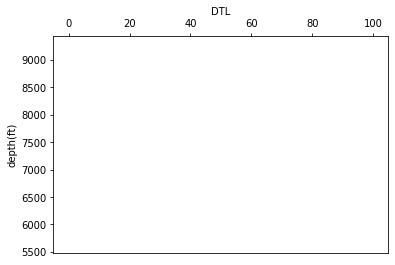

In [41]:
from tkinter import * 
import pandas as pd
from matplotlib.figure import Figure 
#from matplotlib.backends.backend_qt4agg import NavigationToolbar2QT as NavigationToolbar
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg,  
NavigationToolbar2Tk)  


def plot(): 
  
    # the figure that will contain the plot 
    fig = Figure(figsize = (22, 20), 
                 dpi = 100) 
    data = pd.read_excel(location +'1.xls')
    columns= data.columns.values[:]
    print(columns)
    data=data.replace(to_replace =-999.25, value =0) 
    
    #fig1 = plt.figure(figsize=(22,20))
    plot1 = fig.add_subplot(1,3,1)
    
    start1=data[columns[0]].min()-5
    stop1=data[columns[0]].max()+5

    label=columns[2]
    #plt.subplot(1,3,1)
    plot1.plot(data.iloc[:,2], data.iloc[:,1], 'g-')

    if (data[label] == 0).any()== 'true':
        K=data.nlargest(2, label)
        kxmax=K.iloc[0,1]+5
        K1=data.nsmallest(2,label)
        kxmin=K1.iloc[0,1]-5
    else:
        kxmin=data[label].min()-5
        kxmax=data[label].max()+5
    plt.xlim(kxmin,kxmax)
    plt.ylim(start,stop)
    #plt.yticks(np.arange(stop,start,50))
    plt.xlabel(label)
    plt.ylabel('depth(ft)')
    ax = plt.gca()
    ax.invert_yaxis()
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    
    
    
    plot2 = fig.add_subplot(1,3,2)
    plot2.plot(data.iloc[:,3], data.iloc[:,1], 'b-')
    label=columns[3]
    if (data[label] == 0).any()== 'true':
        K=data.nlargest(2, label)
        kxmax=K.iloc[0,1]+5
        K1=data.nsmallest(2,label)
        kxmin=K1.iloc[0,1]-5
    else:
        kxmin=data[label].min()-5
        kxmax=data[label].max()+5
    plt.xlim(kxmin,kxmax)
    plt.ylim(start,stop)
    #plt.yticks(np.arange(stop,start,50))
    plt.xlabel(label)
    plt.ylabel('depth(ft)')
    ax = plt.gca()
    ax.invert_yaxis()
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    
    plot3 = fig.add_subplot(1,3,3)
    plot3.plot(data.iloc[:,4], data.iloc[:,1], 'b-')

    label=columns[4]
    if (data[label] == 0).any()== 'true':
        K=data.nlargest(2, label)
        kxmax=K.iloc[0,1]+5
        K1=data.nsmallest(2,label)
        kxmin=K1.iloc[0,1]-5
    else:
        kxmin=data[label].min()-5
        kxmax=data[label].max()+5
    plt.xlim(kxmin,kxmax)
    plt.ylim(start,stop)
    #plt.yticks(np.arange(stop,start,50))
    plt.xlabel(label)
    plt.ylabel('depth(ft)')
    ax = plt.gca()
    ax.invert_yaxis()
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    
     
  
    # creating the Tkinter canvas 
    # containing the Matplotlib figure 
    canvas = FigureCanvasTkAgg(fig, 
                               master = window)   
    canvas.draw() 
  
    # placing the canvas on the Tkinter window 
    canvas.get_tk_widget().pack() 
  
    # creating the Matplotlib toolbar 
    #toolbar = NavigationToolbar2QT (canvas, 
    #                               window) 
    toolbar = NavigationToolbar2Tk(canvas, 
                                   window)
    toolbar.update() 
  
    # placing the toolbar on the Tkinter window 
    canvas.get_tk_widget().pack() 
  
# the main Tkinter window 
window = Tk() 
  
# setting the title  
window.title('Well plots') 
  
# dimensions of the main window 
window.geometry("500x500") 
  
# button that displays the plot 
plot_button = Button(master = window,  
                     command = plot, 
                     height = 2,  
                     width = 10, 
                     text = "Plot") 
  
# place the button  
# in main window 
plot_button.pack() 
  
# run the gui 
window.mainloop()

In [ ]:
def plot_logs_2():
    
    data = pd.read_excel(location +'1.xls')
    columns= data.columns.values[:]
    print(columns)
    data=data.replace(to_replace =-999.25, value =0) 
    
    fig1 = plt.figure(figsize=(22,20))
    
    
    start1=data[columns[0]].min()-5
    stop1=data[columns[0]].max()+5

    plt.subplot(1,3,1)
    plt.plot(data.iloc[:,1], data.iloc[:,2], 'g-')

    if (data[label] == 0).any()== 'true':
        K=data.nlargest(2, label)
        kxmax=K.iloc[0,1]+5
        K1=data.nsmallest(2,label)
        kxmin=K1.iloc[0,1]-5
    else:
        kxmin=data[label].min()-5
        kxmax=data[label].max()+5
    plt.xlim(kxmin,kxmax)
    plt.ylim(start,stop)
    #plt.yticks(np.arrange(start,stop,50)
    plt.xlabel(label)
    plt.ylabel('depth(ft)')
    ax = plt.gca()
    ax.invert_yaxis()
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    
    
    plt.subplot(1,3,2)
    plt.plot(data.iloc[:,1], data.iloc[:,3], 'b-')
    label=columns[3]
    if (data[label] == 0).any()== 'true':
        K=data.nlargest(2, label)
        kxmax=K.iloc[0,1]+5
        K1=data.nsmallest(2,label)
        kxmin=K1.iloc[0,1]-5
    else:
        kxmin=data[label].min()-5
        kxmax=data[label].max()+5
    plt.xlim(kxmin,kxmax)
    plt.ylim(start,stop)
    #plt.yticks(np.arrange(start,stop,50)
    plt.xlabel(label)
    plt.ylabel('depth(ft)')
    ax = plt.gca()
    ax.invert_yaxis()
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    
    
    plt.subplot(1,3,3)
    plt.plot(data.iloc[:,1], data.iloc[:,4], 'r-')
    label=columns[4]
    if (data[label] == 0).any()== 'true':
        K=data.nlargest(2, label)
        kxmax=K.iloc[0,1]+5
        K1=data.nsmallest(2,label)
        kxmin=K1.iloc[0,1]-5
    else:
        kxmin=data[label].min()-5
        kxmax=data[label].max()+5
    plt.xlim(kxmin,kxmax)
    plt.ylim(start,stop)
    #plt.yticks(np.arrange(start,stop,50)
    plt.xlabel(label)
    plt.ylabel('depth(ft)')
    ax = plt.gca()
    ax.invert_yaxis()
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    
    #Plotting DTCO 
    #plt.subplot(1,3,2)
    #plt.plot(DTCO, depth, 'b-')
    #plt.xlim((240,40))
    #plt.ylim((start,stop))
    #plt.yticks(np.arange(start,stop,50))
    #plt.xlabel('DTCO(us/ft)')
    #plt.ylabel('depth(ft)')
    #ax = plt.gca()
    #plt.hold(True)
    return   